<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Linear Regression</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

watermark  2.0.2
numpy      1.19.2
matplotlib 3.3.2
Thu Nov 19 2020 2020-11-19T12:03:44-05:00

CPython 3.8.5
IPython 7.19.0

compiler   : Clang 10.0.0 
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 5faa1cf988a8df7807c70254f2cc0803f5e2ee80


In [3]:
plt.style.use('./d4sci.mplstyle')

## Load dataset

In [4]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [5]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [6]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

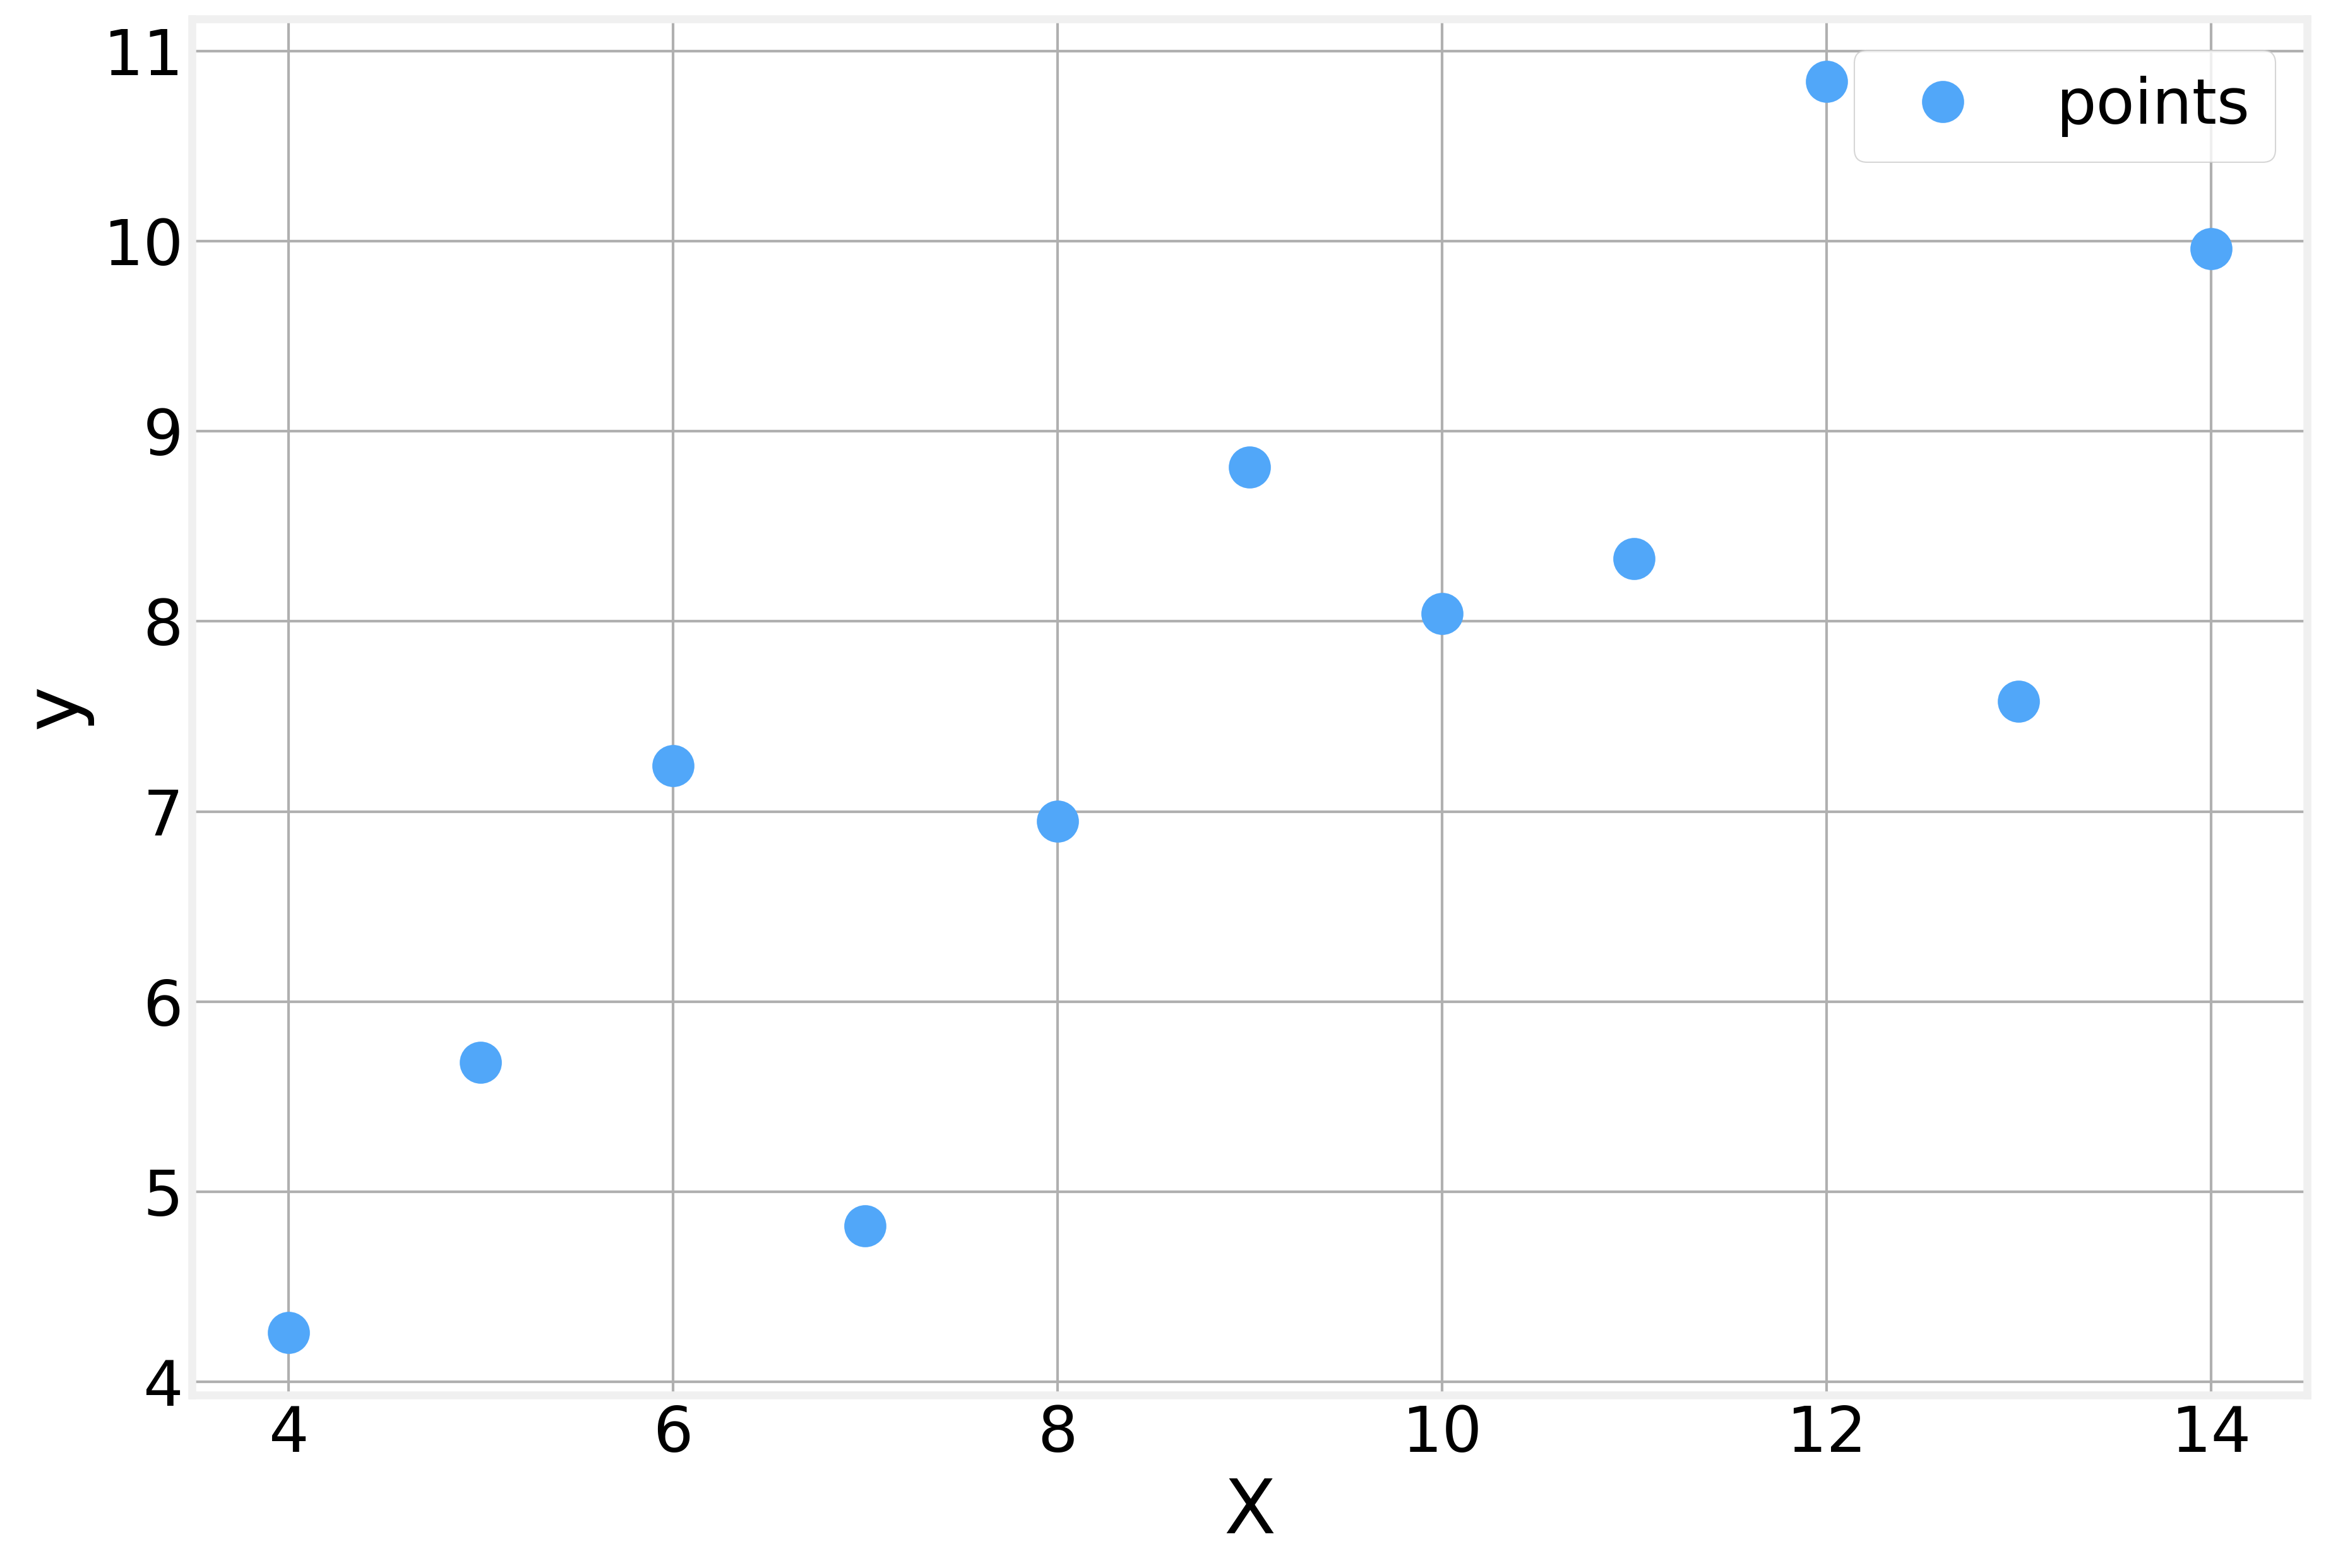

In [9]:
plt.plot(X, y, '.', markersize=30, label='points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 1.030251275529228 0.0008822087454838368 [0.28919281 0.76852272]
200 0.9510615865837712 0.0007095716173637356 [0.56886323 0.74082989]
300 0.8873683212979244 0.0005707173985136649 [0.81968139 0.715994  ]
400 0.8361390249489072 0.00045903519954282324 [1.04462383 0.69372031]
500 0.7949346559683367 0.00036920779875970755 [1.24636004 0.67374449]
600 0.7617934624699885 0.00029695848771704725 [1.42728408 0.65582948]
700 0.7351375826769289 0.0002388474558859821 [1.58954306 0.63976267]
800 0.7136979224674239 0.00019210802028912788 [1.73506255 0.6253534 ]
900 0.6964537334379282 0.00015451490292173187 [1.86556949 0.61243067]
1000 0.6825840147773152 0.0001242782846283541 [1.98261265 0.60084111]
1100 0.6714284251815665 9.995859129507956e-05 [2.08758102 0.59044719]
1200 0.6624558438139164 8.039795531111782e-05 [2.18172031 0.58112557]
1300 0.6552390834886894 6.466508915869973e-05 [2.2661477  0.57276561]
1400 0.6494345521662388 5.201094654305738e-05 [2.34186512 0.56526811]
1500 0.6447658944368784 4

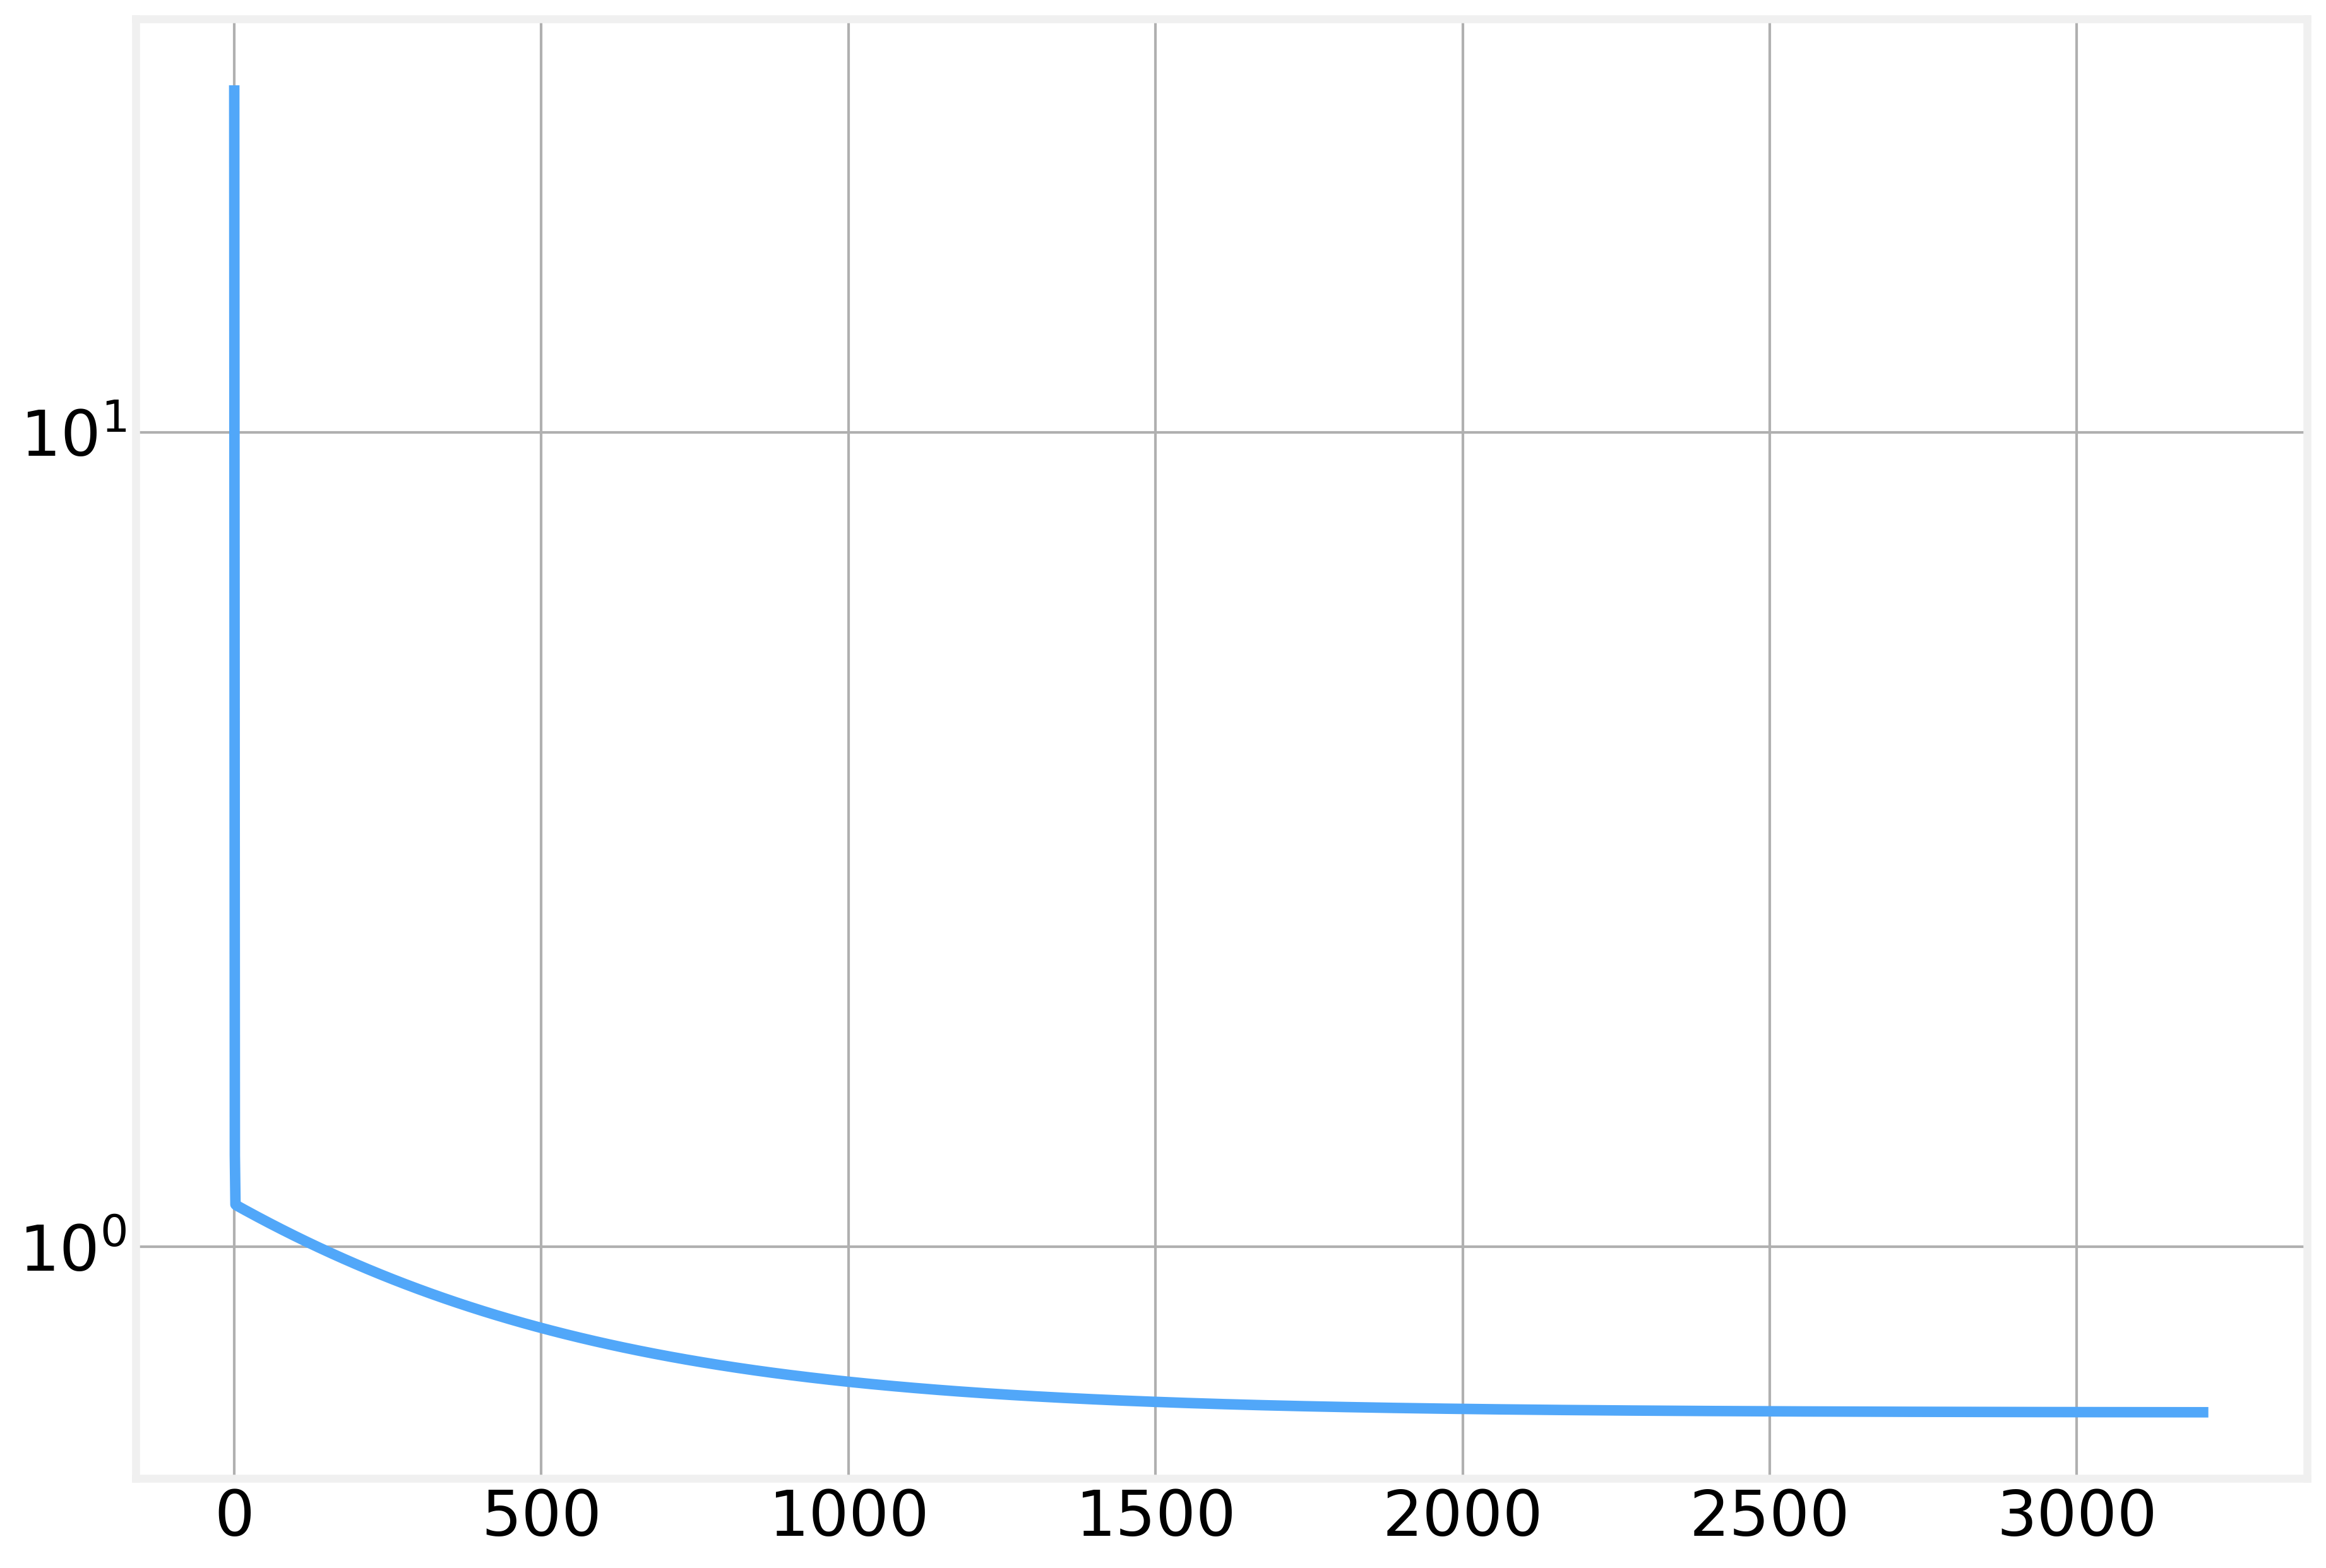

In [14]:
plt.semilogy(Js)

In [15]:
weights.flatten()

array([2.90886764, 0.50912379])

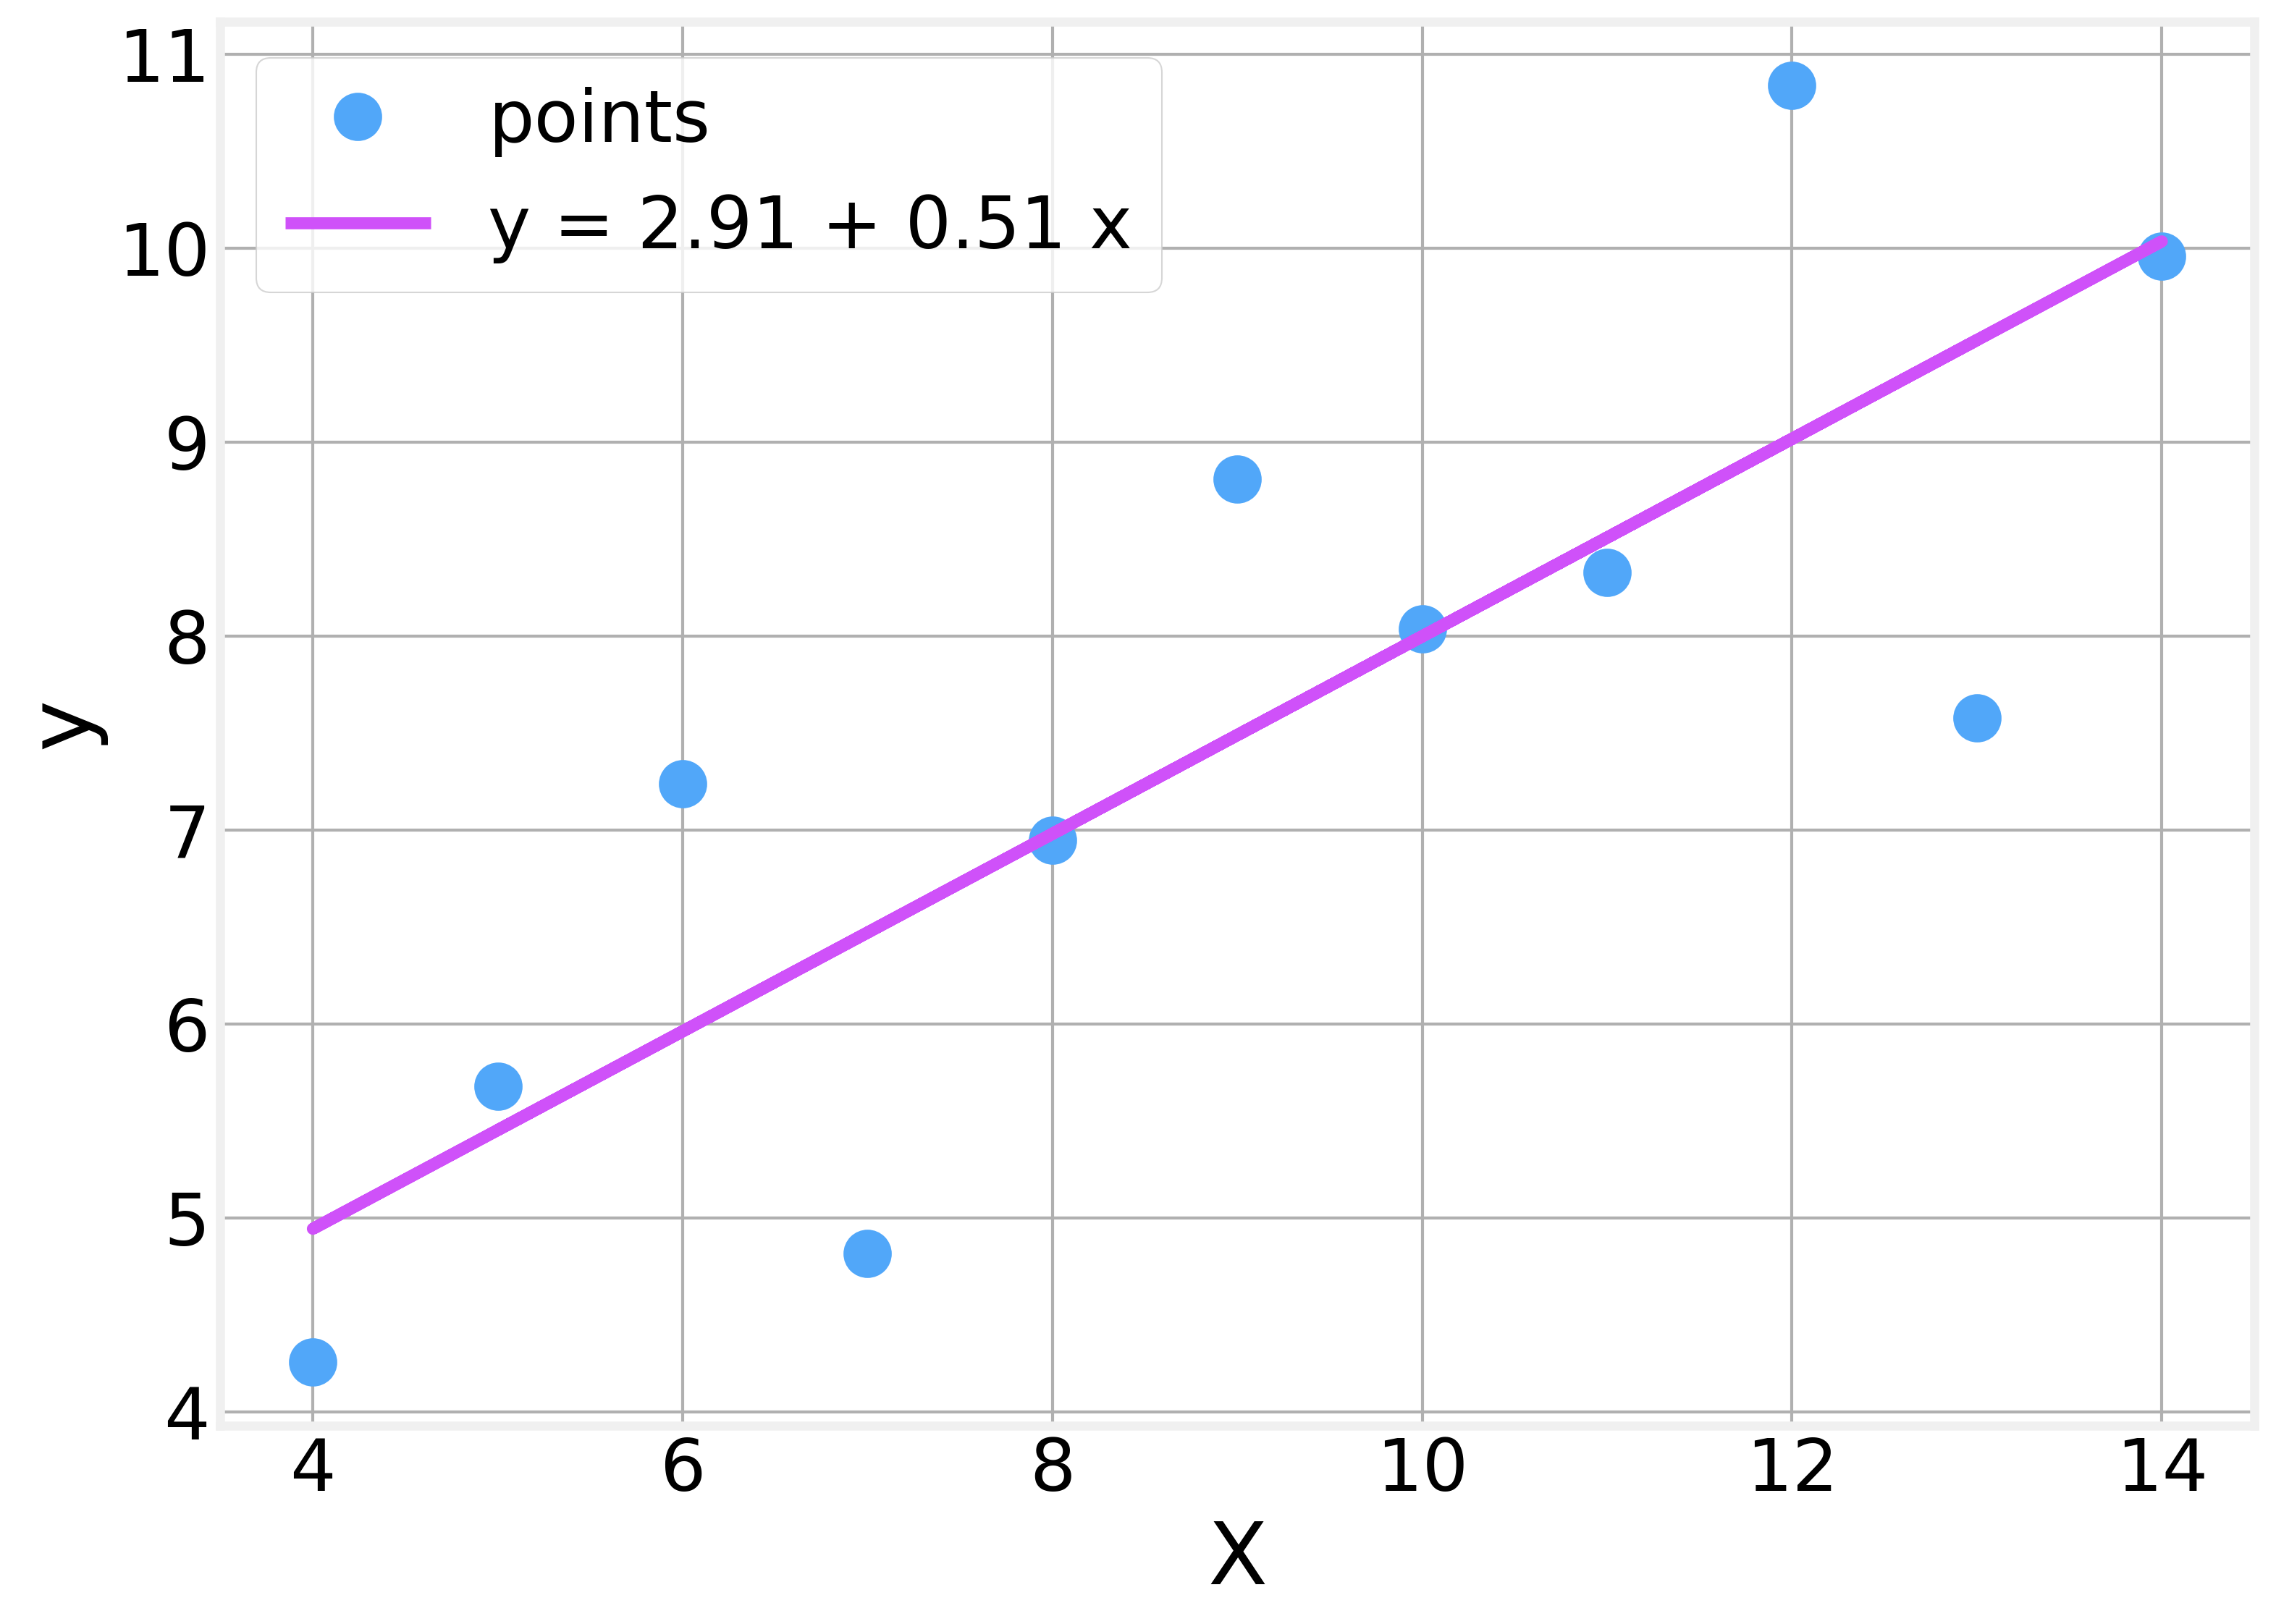

In [16]:
plt.plot(X.T[1], y, '.', markersize=30, label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), '-',\
         label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.gcf().set_size_inches(11, 8)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>